# Resume Classification 

#      EDA On Resume Classification

# Business objective :
The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention.

In [1]:
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

C:\Users\91913\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path   = r'Resumes/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [3]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [4]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


# 2.1 Type of File Format

In [5]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

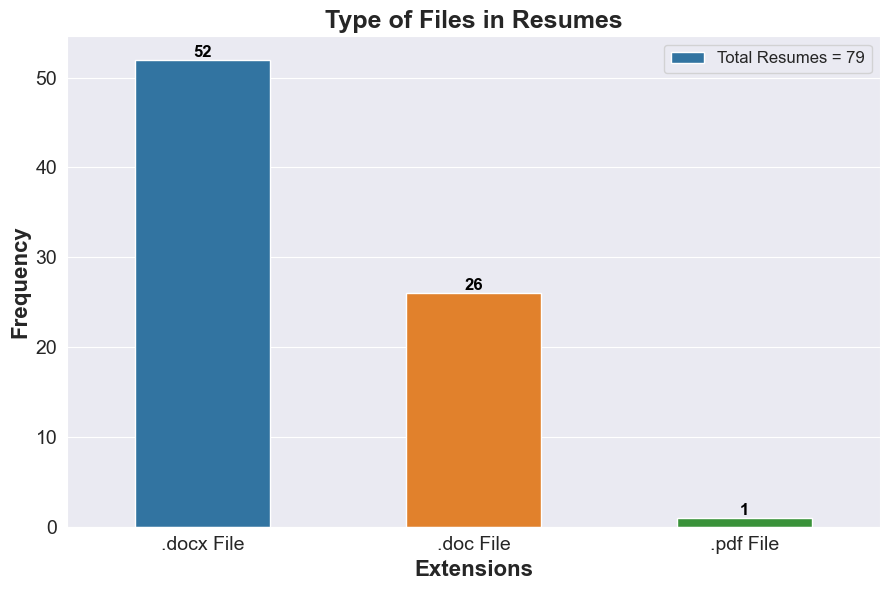

In [82]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

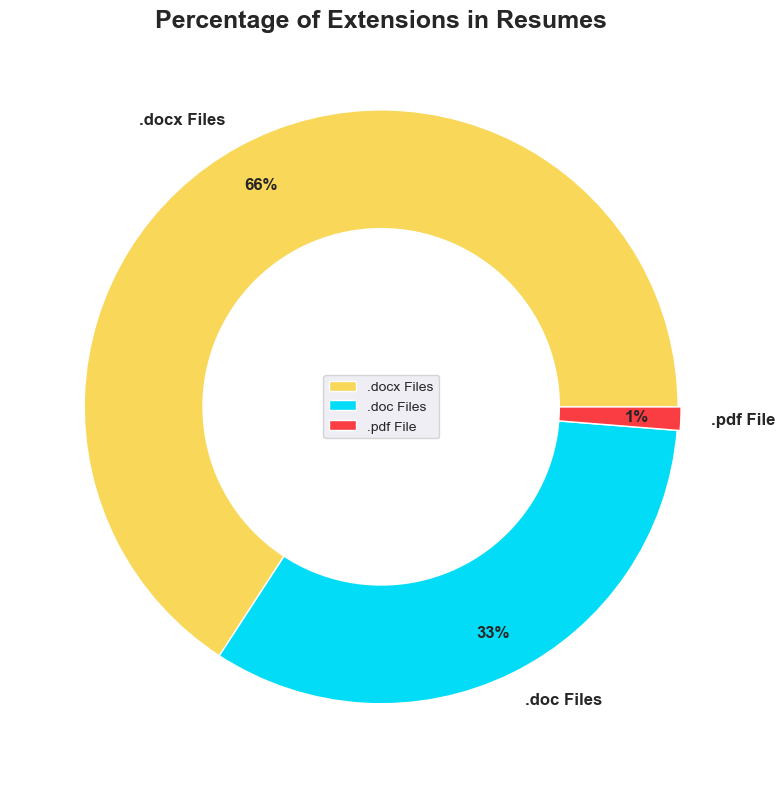

In [8]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# 3. Extract Resumes by Profile Category

In [9]:
file_path = r'Resumes/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [10]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,workday resumes,Sri Krishna S_Hexaware.doc
75,workday resumes,Srikanth-Hexaware.docx
76,workday resumes,SSKumar_Hexaware.docx
77,workday resumes,Venkateswarlu B_Hexaware.doc


In [11]:
resume_data.Profile.value_counts().index

Index(['React', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object', name='Profile')

In [12]:
resume_data.Profile.value_counts()

Profile
React                              24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: count, dtype: int64

# 3.1 Number of Total Resumes

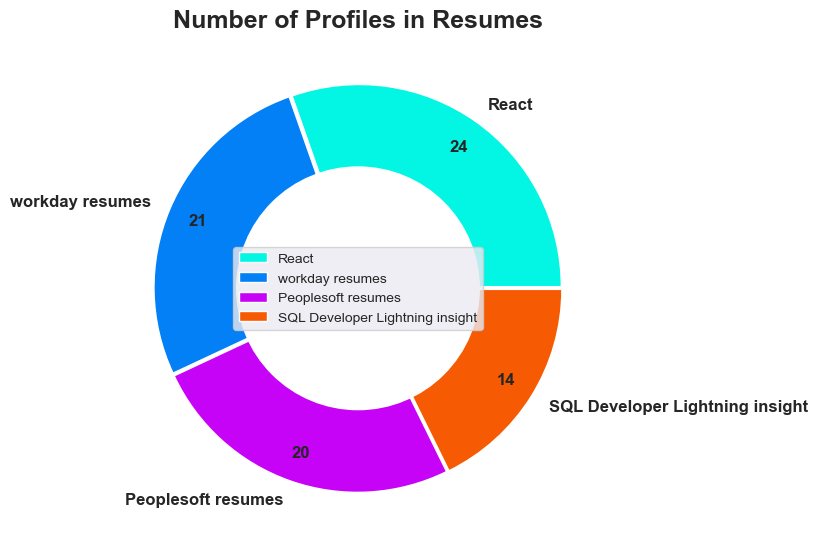

In [14]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

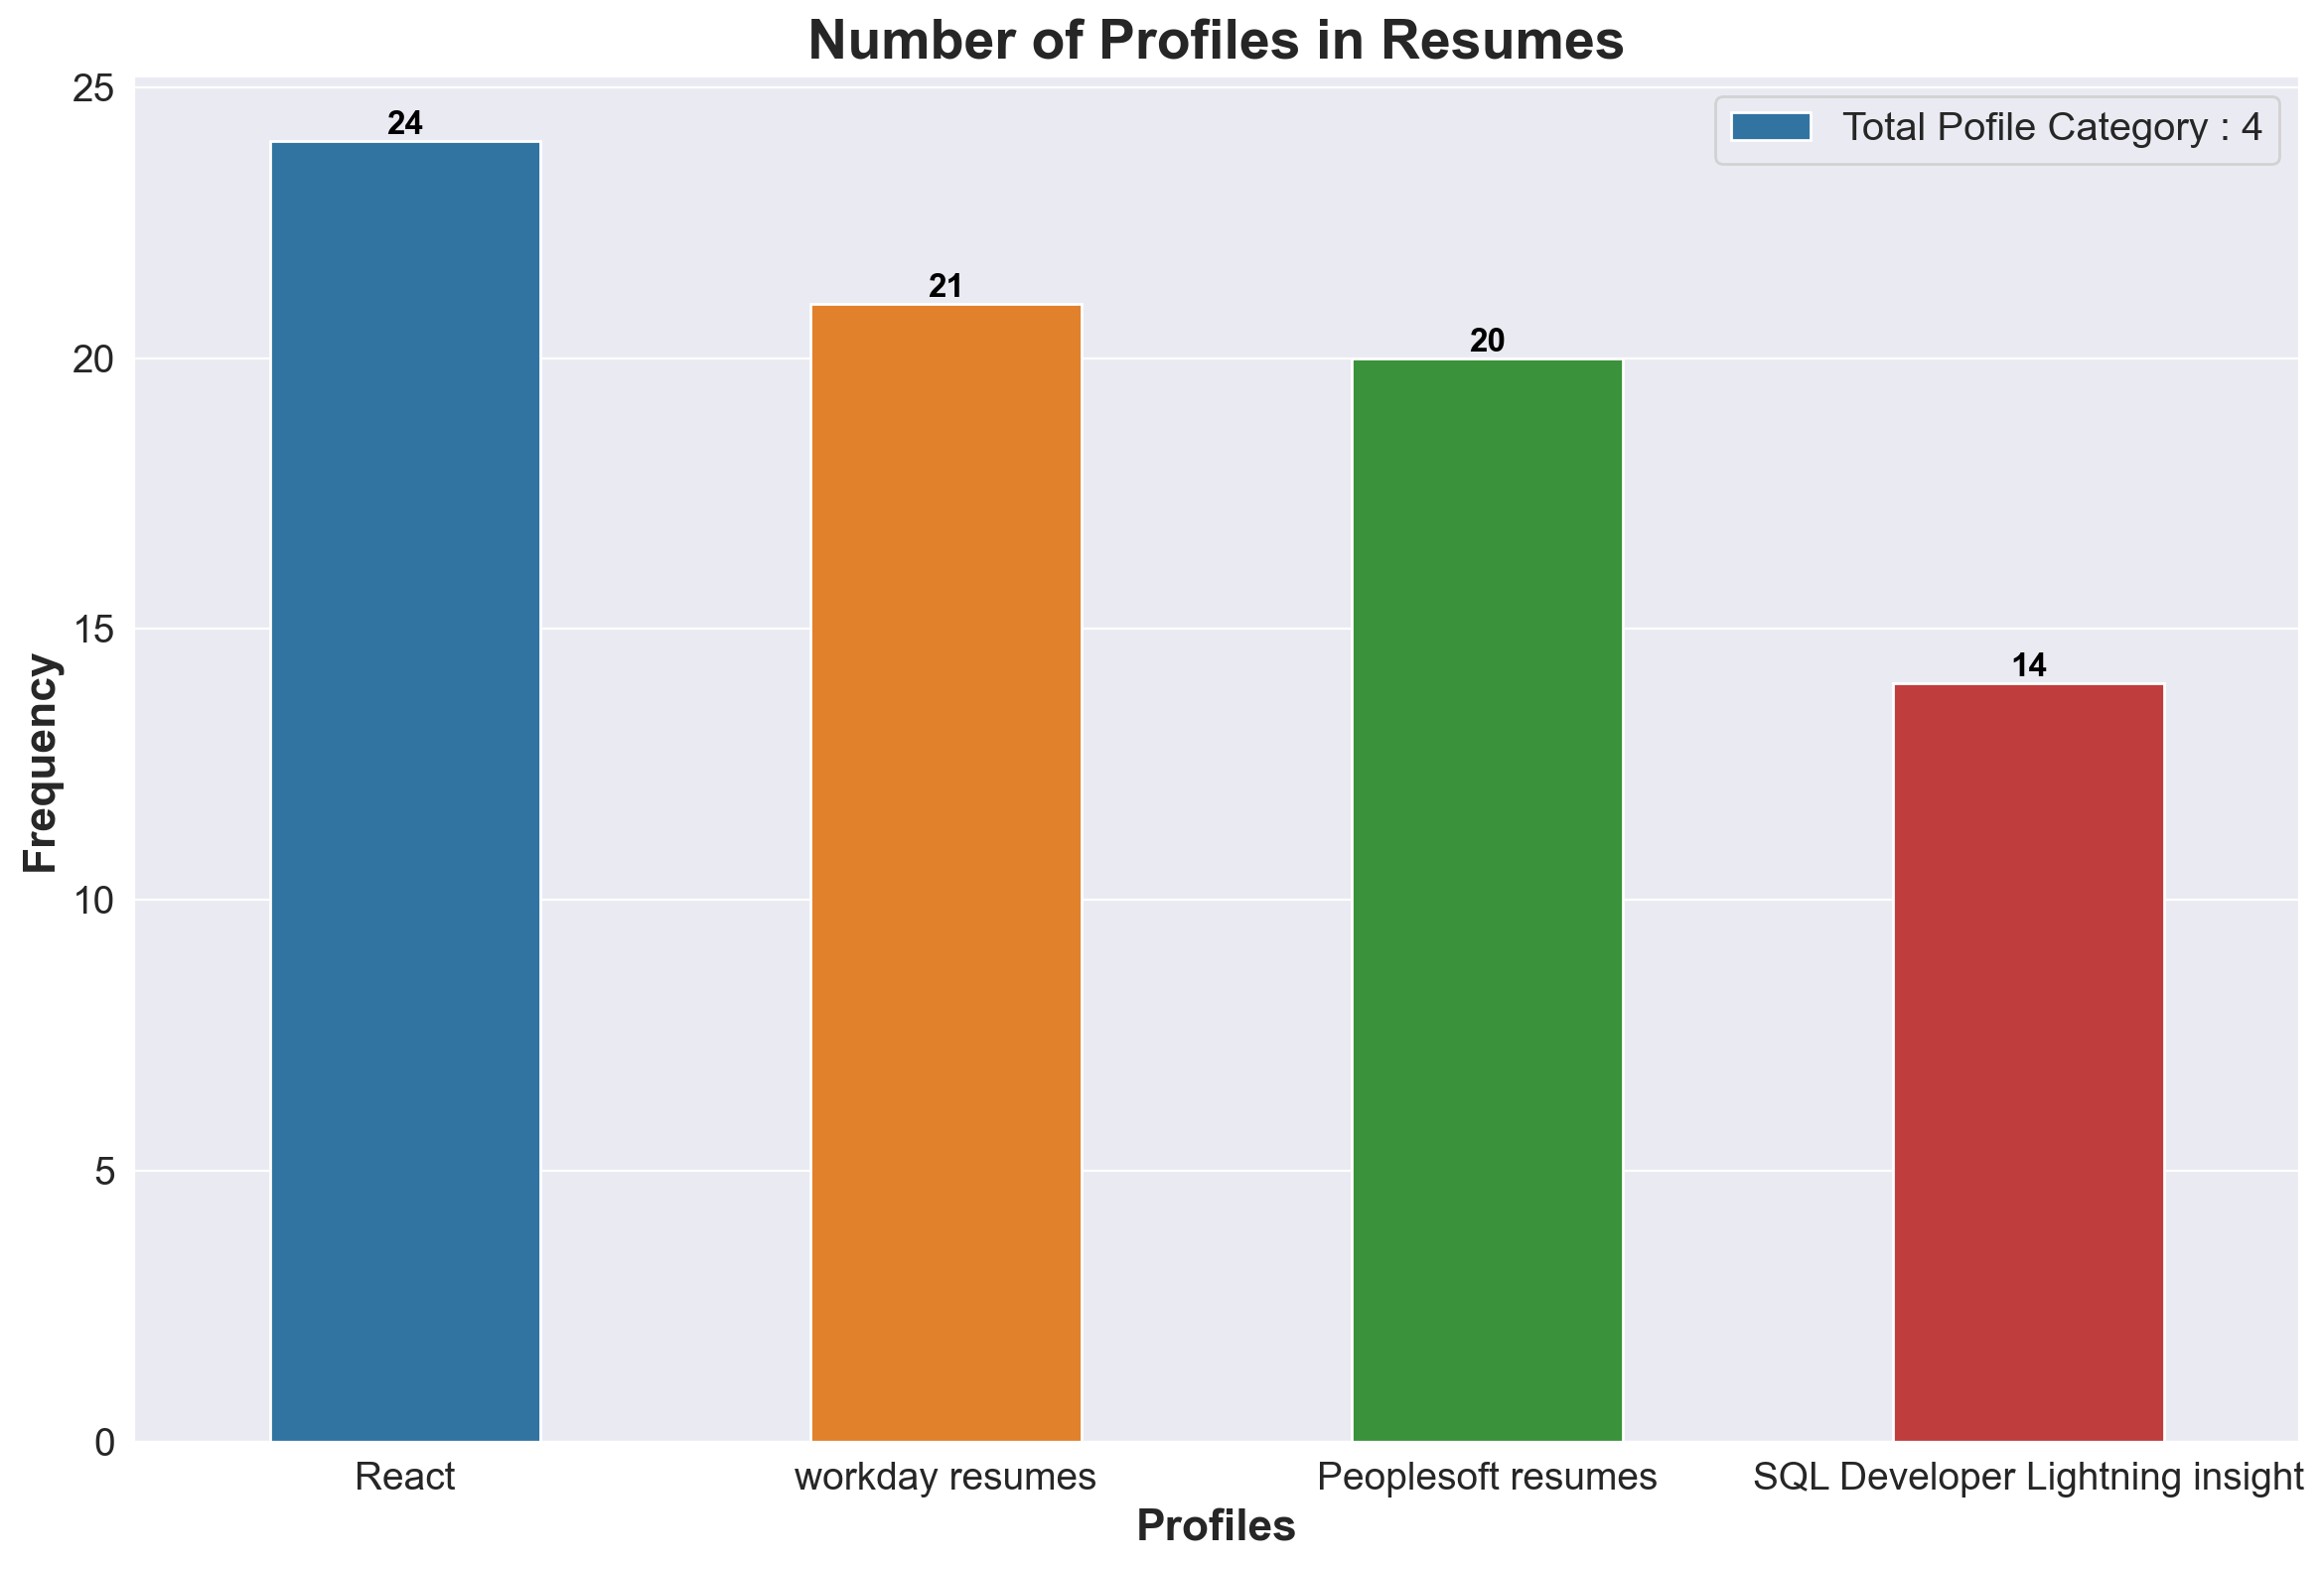

In [23]:
fig, axe = plt.subplots(1,1, figsize=(12,8), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# Percentage of Profiles Category

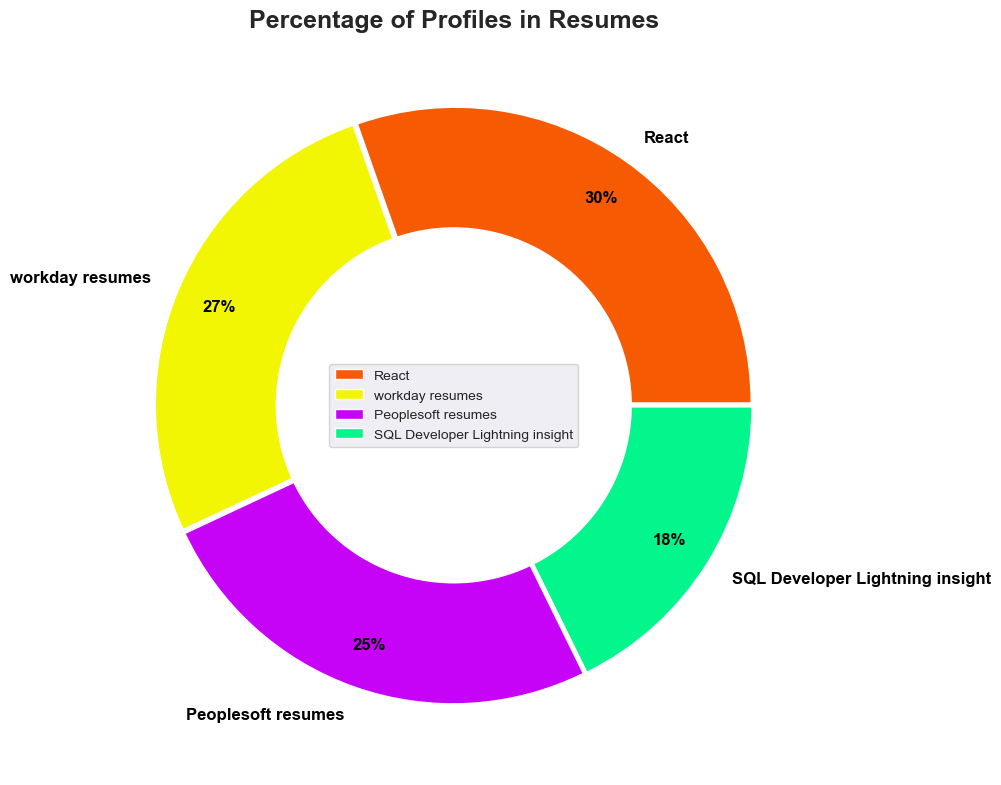

In [25]:
fig = plt.figure(figsize=(10,10),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# 4. Reading a Resume File

In [45]:
# Function to read a resume file
def read_resume(file_path):
    # Check if the file exists
    if os.path.exists(file_path):
        # Extract text from the .docx file
        text = docx2txt.process(file_path)
        return text
    else:
        print(f"The file '{file_path}' does not exist.")
        return None

# Example usage:
resume_file_path = "D:\Project 2 Resume Classification\Resumes\React\React Developer_Thirupathiamma.docx"
resume_text = read_resume(resume_file_path)
if resume_text:
    print("Resume Content:")
    print(resume_text)

Resume Content:
Thirupathamma Balla



SUMMARY:



2.8 year of IT experience as React Developer. 

Worked on technologies like React, JavaScript. 

Experience in developing business applications for the Internet using React.

Experience in Object Oriented Programming concepts. 

Strong Analytical Ability skills.

Enthusiastic, eager to meet challenges and quick to learn and assimilate new   concepts and ideas.

Ability to work efficiently, either independently or on a team with minimal supervision and without ever missing a deadline.

Brief Profile



Work Experience

:

2.8 Year(s) 

Current Employer

:

Predifast Technologies Private Limited.  [React Developer]

Industry

:

IT-Software/Software Services

Highest Degree

:

B. Tech (EEE)

Current

:

Hyderabad

Date of Birth (Gender)

:

5th November, 1999



Summary of Skills & Experience



Work Experience

Duration

:

Mar 2020 - Till Date

Company

:

Predifast Technologies Private Limited.  

Designation

:

React Developer.

Jo

In [50]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx('D:\Project 2 Resume Classification\Resumes\React\Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx'))

MD KHIZARUDDIN RAUF 

   EXPERIENCE 

     

⇨ Currently working in PickupBiz Solution Private Limited, Pune from January 2021 to till date 

⇨ 9 Months of working as an Intern on UI React JS - Software Developer 

⇨ Having sound experience and exposure on UI development using React JS, Bootstrap, HTML 5, CSS, React Hooks, and Redux etc. 

⇨ Ability to work under any given environment 

⇨ Demonstrated good communication and Analytical skills 

⇨ Team building skills, emphasizing versatility and adaptability 

⇨ Dedication and drive as a hard-working individual 

⇨ Ability to manage multiple tasks in a pressured environment 

                                                                           

Application Development & UI Designing – 

 Coordinated with the development team of 10 to discuss user interface ideas and applications. - Reviewed application requirements and interface designs to ensure compatibility with existing applications.  

 

UI Components Designing & Applicatio

# 5. Data Exploration

In [51]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,hari narayana professional summary years exper...
6,PeopleSoft,murali professional summary years experience p...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,address manyata tech park nagavara bangalore l...


# 5.1 N-grams

# N-grams analyses are often used to see which words often show up together.

In [52]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['classification']),
 WordList(['internal']),
 WordList(['classification']),
 WordList(['internal']),
 WordList(['murali']),
 WordList(['experience']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['working']),
 WordList(['peoplesoft']),
 WordList(['administration']),
 WordList(['performing']),
 WordList(['various']),
 WordList(['infrastructure']),
 WordList(['related']),
 WordList(['activities']),
 WordList(['peoplesoft']),
 WordList(['environments']),
 WordList(['installed'])]

In [53]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['classification', 'internal']),
 WordList(['internal', 'classification']),
 WordList(['classification', 'internal']),
 WordList(['internal', 'murali']),
 WordList(['murali', 'experience']),
 WordList(['experience', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'working']),
 WordList(['working', 'peoplesoft']),
 WordList(['peoplesoft', 'administration']),
 WordList(['administration', 'performing']),
 WordList(['performing', 'various']),
 WordList(['various', 'infrastructure']),
 WordList(['infrastructure', 'related']),
 WordList(['related', 'activities']),
 WordList(['activities', 'peoplesoft']),
 WordList(['peoplesoft', 'environments']),
 WordList(['environments', 'installed']),
 WordList(['installed', 'configured'])]

In [54]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['classification', 'internal', 'classification']),
 WordList(['internal', 'classification', 'internal']),
 WordList(['classification', 'internal', 'murali']),
 WordList(['internal', 'murali', 'experience']),
 WordList(['murali', 'experience', 'summary']),
 WordList(['experience', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'working']),
 WordList(['experience', 'working', 'peoplesoft']),
 WordList(['working', 'peoplesoft', 'administration']),
 WordList(['peoplesoft', 'administration', 'performing']),
 WordList(['administration', 'performing', 'various']),
 WordList(['performing', 'various', 'infrastructure']),
 WordList(['various', 'infrastructure', 'related']),
 WordList(['infrastructure', 'related', 'activities']),
 WordList(['related', 'activities', 'peoplesoft']),
 WordList(['activities', 'peoplesoft', 'environments']),
 WordList(['peoplesoft', 'environments', 'installed']),
 WordList(['environments', 'installed', 

In [55]:
resume_data['Resume_Details']

0     anubhav kumar singh core competencies scriptin...
1     classification internal classification interna...
2     sirazuddin bangalore india sirazuddin bangalor...
3     peoplesoft admin varkala vikas career objectiv...
4     peoplesoft administration vivekanand sayana ca...
5     hari narayana professional summary years exper...
6     murali professional summary years experience p...
7     priyabrata hota career objective pursuing peop...
8     tanna sujatha objective seeking challenging ro...
9     address manyata tech park nagavara bangalore l...
10    name ravali curriculum vitae specialization co...
11    susovan bag seeking challenging position field...
12    kanumuru deepak reddy career objective secure ...
13    haripriya battina experience developer reactjs...
14    kamalakar reddy linked professional summary ye...
15    naveen sadhu title software developer location...
16    pragnya pattnaik expertise around years experi...
17    sarala madasu sarala madasu sri geethika p

# 5.2 Top 20 most used words in Resumes

# Using CountVectorizer

In [56]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [58]:
df_ngram.head(15)

,Frequency,Unigram_Bigram
0,330,experience
1,253,using
2,232,workday
3,213,sql
4,208,application
5,188,server
6,183,project
7,180,data
8,170,reports
9,169,peoplesoft


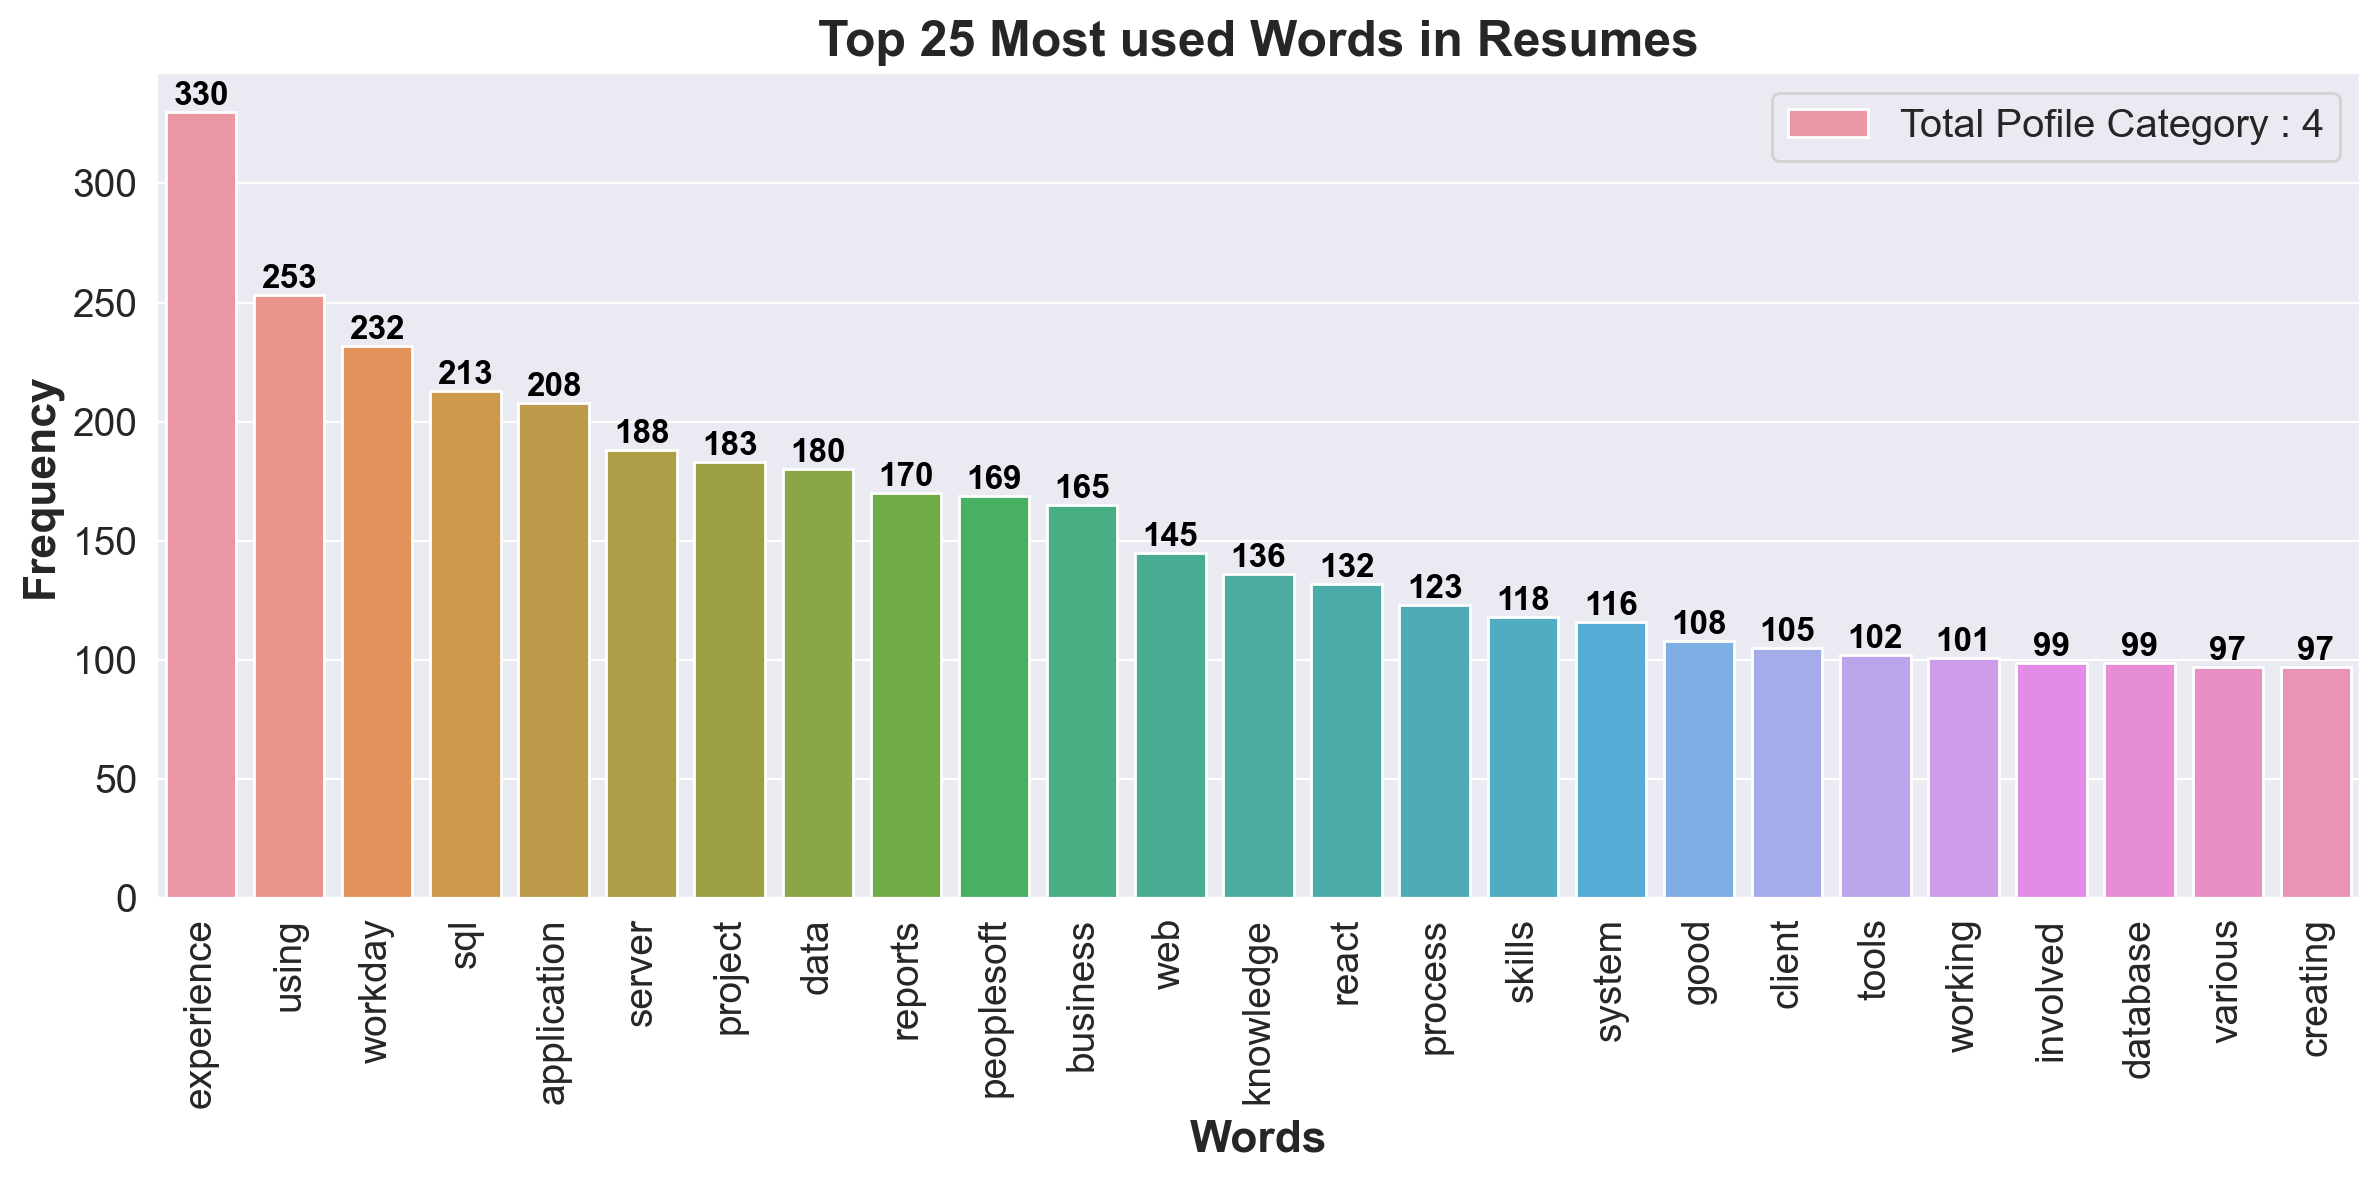

In [59]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# 5.3 Using the Word Clowds

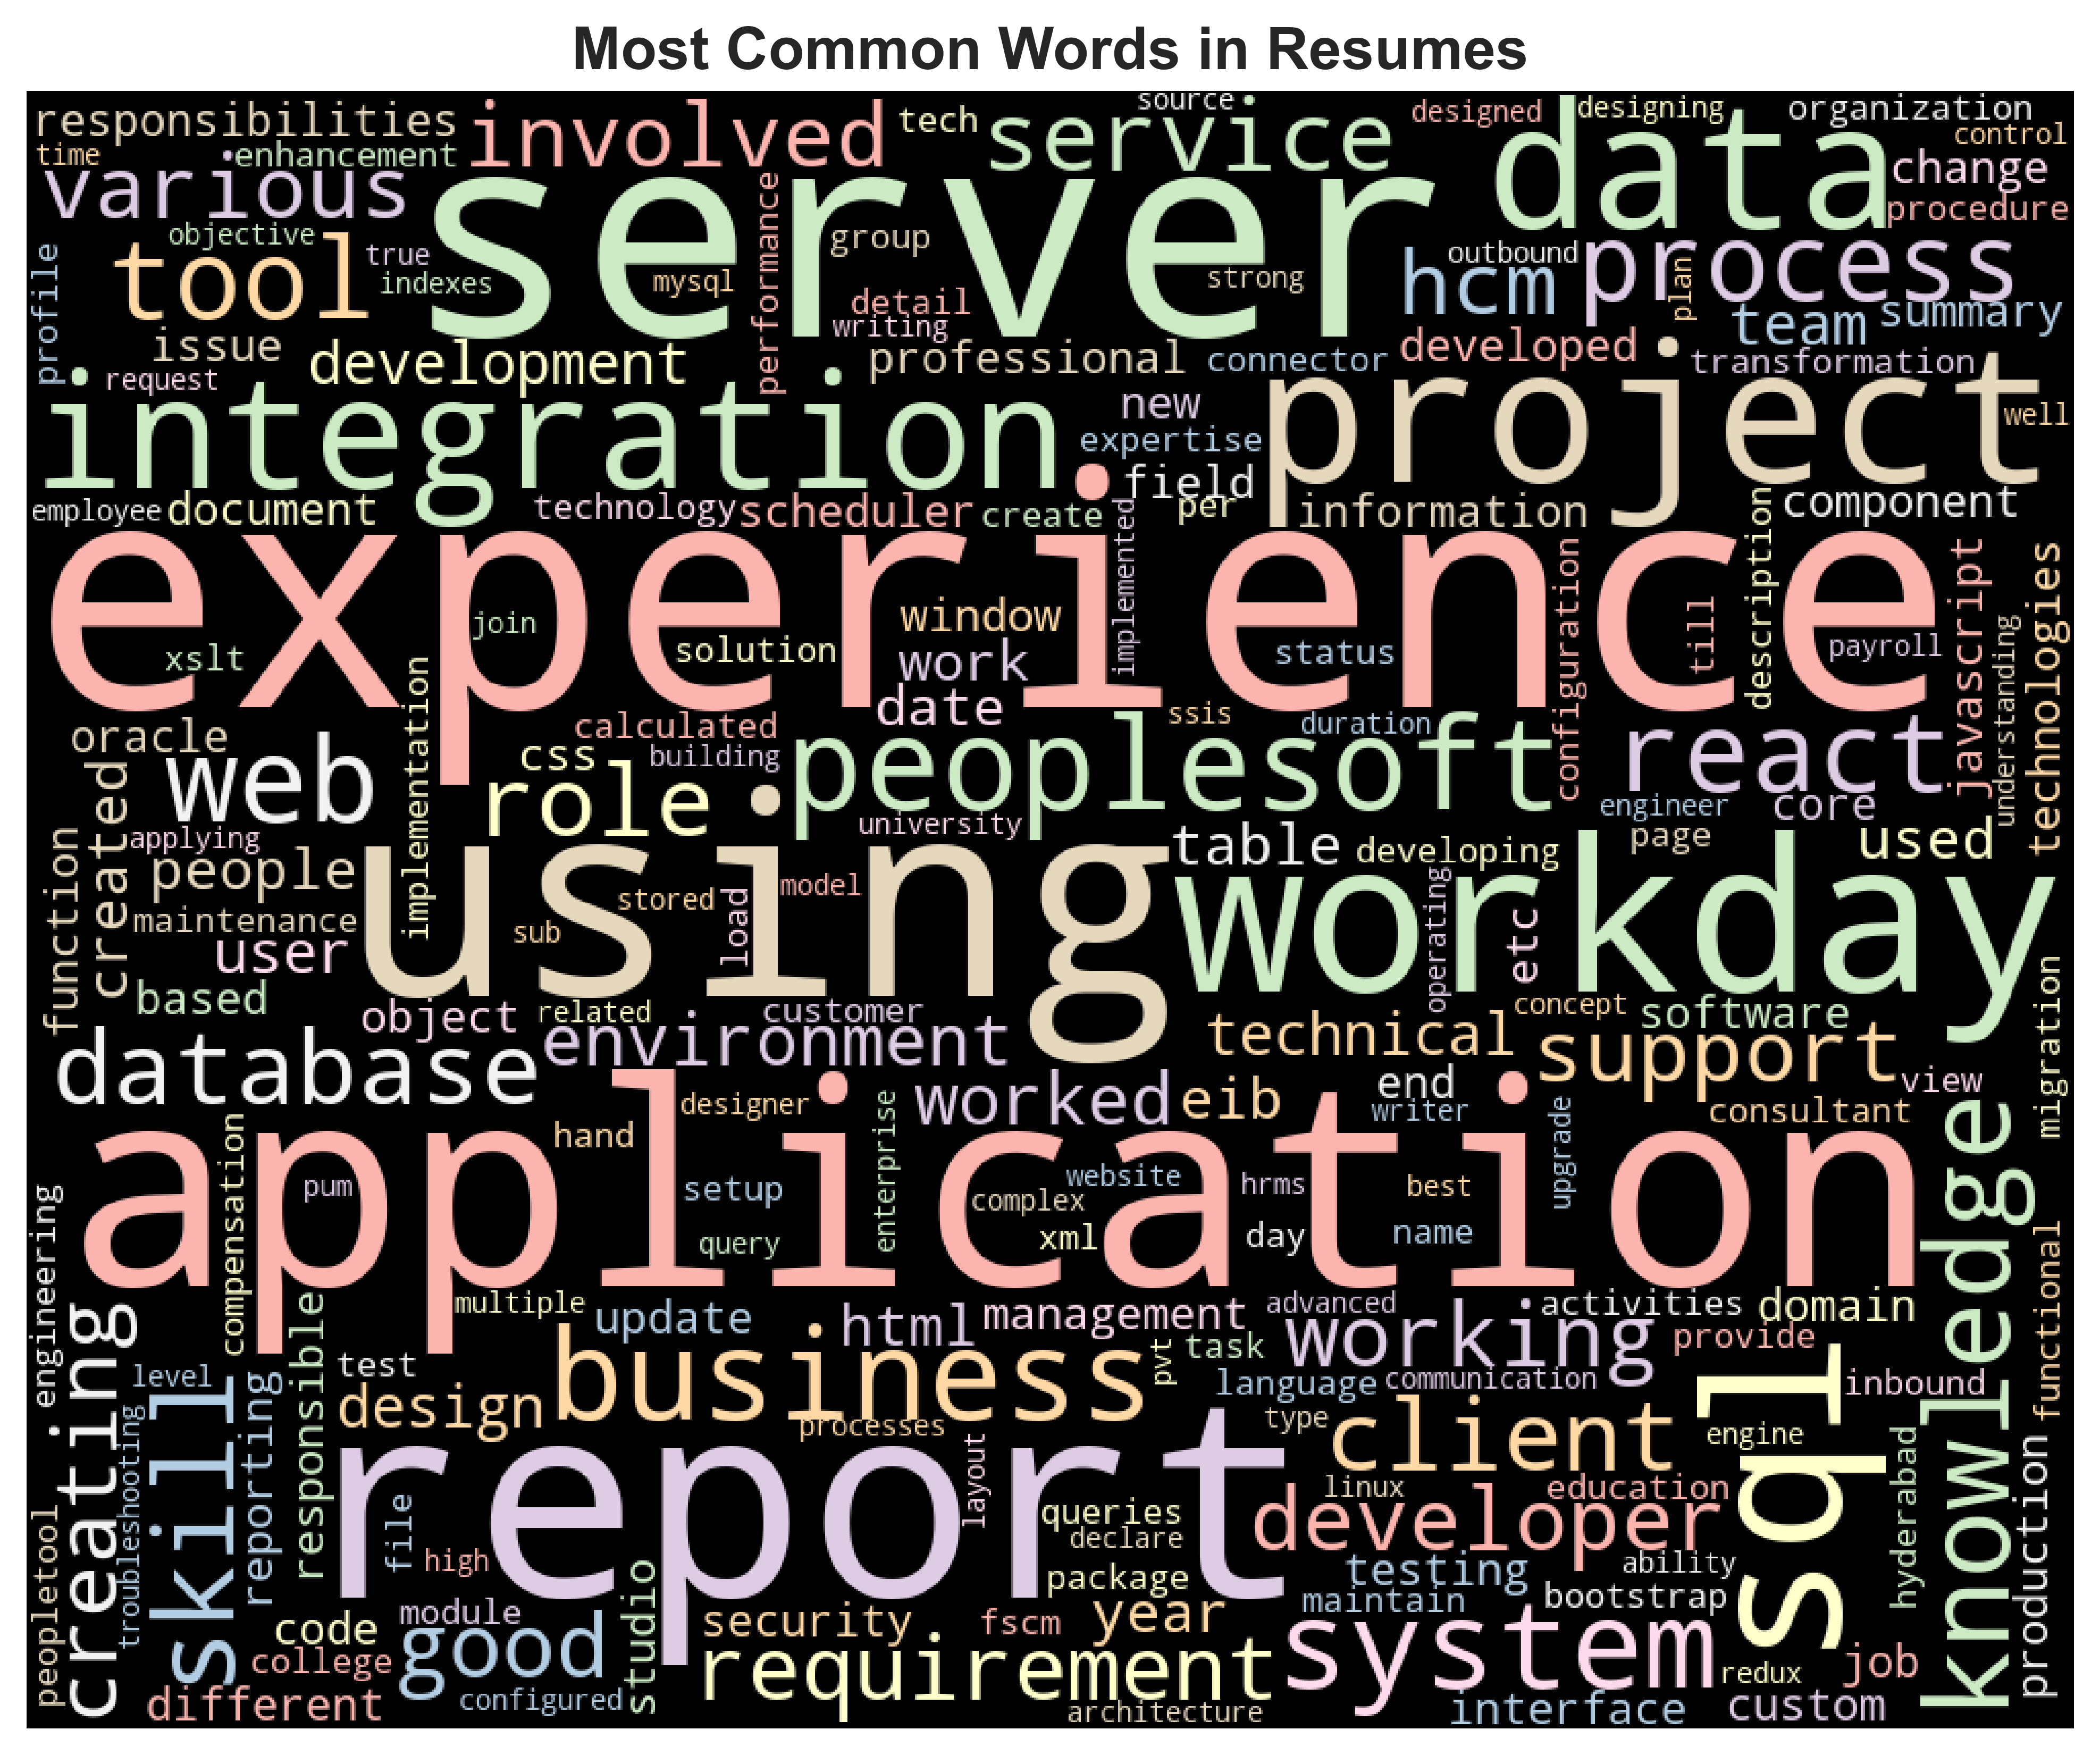

In [61]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Histogram Plot 

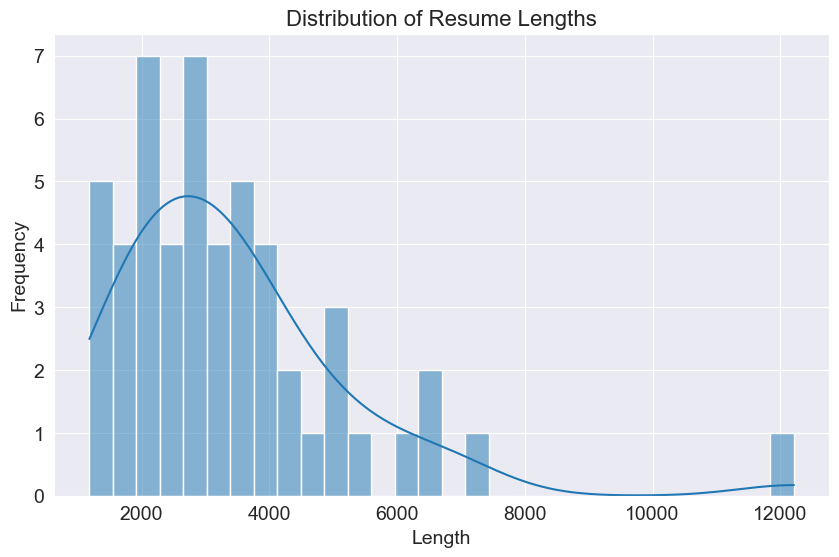

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Plotting the distribution of resume lengths
resume_data['Resume_Length'] = resume_data['Resume_Details'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(resume_data['Resume_Length'], bins=30, kde=True)
plt.title('Distribution of Resume Lengths', fontsize=16)
plt.xlabel('Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

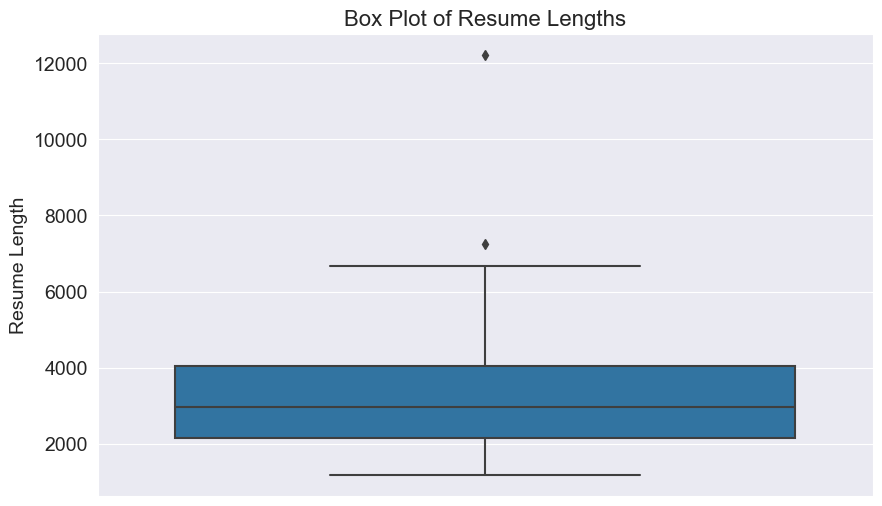

In [71]:
# Assuming 'Resume_Length' is the column representing the length of resumes
plt.figure(figsize=(10, 6))
sns.boxplot(y=resume_data['Resume_Length'])
plt.title('Box Plot of Resume Lengths', fontsize=16)
plt.ylabel('Resume Length', fontsize=14)
plt.show()

In [72]:
# Calculate the interquartile range (IQR)
Q1 = resume_data['Resume_Length'].quantile(0.25)
Q3 = resume_data['Resume_Length'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = resume_data[(resume_data['Resume_Length'] < lower_bound) | (resume_data['Resume_Length'] > upper_bound)]

print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Number of Outliers:", len(outliers))
print("Outliers:")
print(outliers)

Lower Bound for Outliers: -635.125
Upper Bound for Outliers: 6831.875
Number of Outliers: 2
Outliers:
      Category                                     Resume_Details  \
4   PeopleSoft  peoplesoft administration vivekanand sayana ca...   
47     Workday  workday hcm techno functional consultant rahul...   

    Resume_Length  
4           12213  
47           7249  


In [73]:
# Calculate the interquartile range (IQR)
Q1 = resume_data['Resume_Length'].quantile(0.25)
Q3 = resume_data['Resume_Length'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
resume_data_no_outliers = resume_data[(resume_data['Resume_Length'] >= lower_bound) & (resume_data['Resume_Length'] <= upper_bound)]

print("Number of rows before removing outliers:", len(resume_data))
print("Number of rows after removing outliers:", len(resume_data_no_outliers))

Number of rows before removing outliers: 52
Number of rows after removing outliers: 50


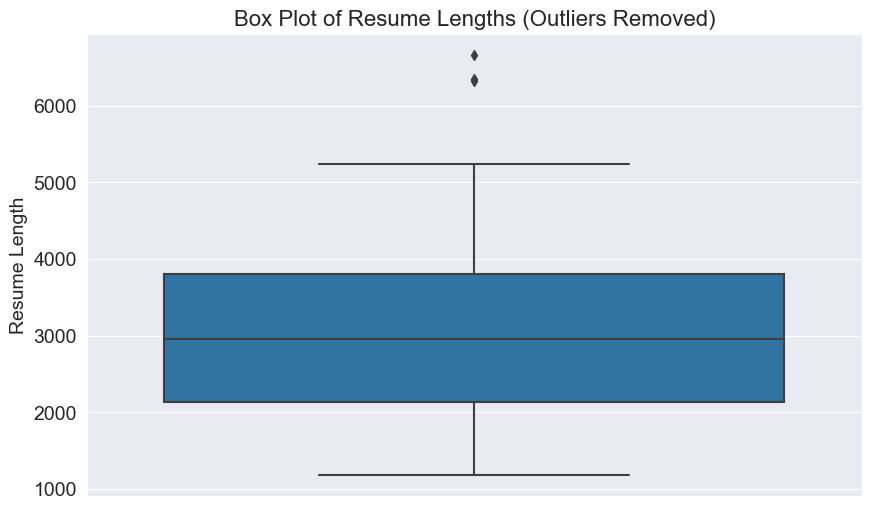

In [75]:
# Calculate the interquartile range (IQR)
Q1 = resume_data['Resume_Length'].quantile(0.25)
Q3 = resume_data['Resume_Length'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_resume_data = resume_data[(resume_data['Resume_Length'] >= lower_bound) & (resume_data['Resume_Length'] <= upper_bound)]

# Creating a box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=cleaned_resume_data['Resume_Length'])
plt.title('Box Plot of Resume Lengths (Outliers Removed)', fontsize=16)
plt.ylabel('Resume Length', fontsize=14)
plt.show()

Key Statistics after Removing Outliers:
Mean Resume Length: 3170.4
Median Resume Length: 2962.0
Minimum Resume Length: 1181
Maximum Resume Length: 6659


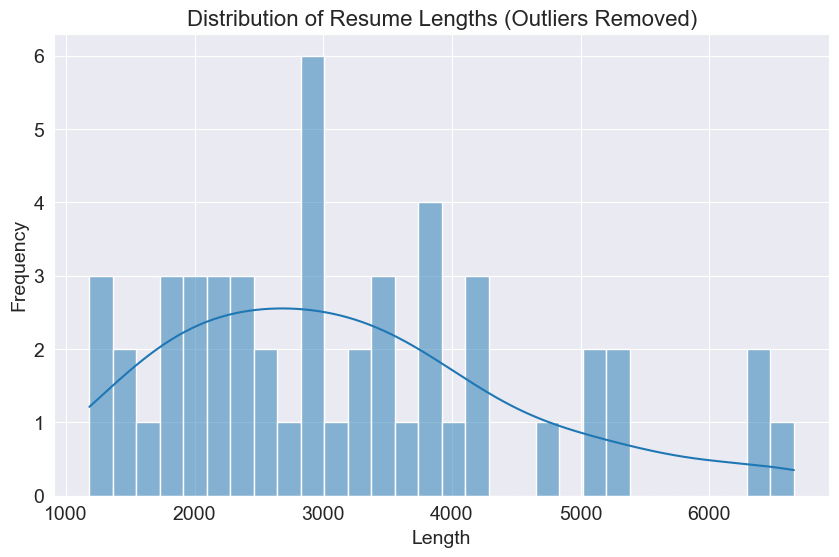

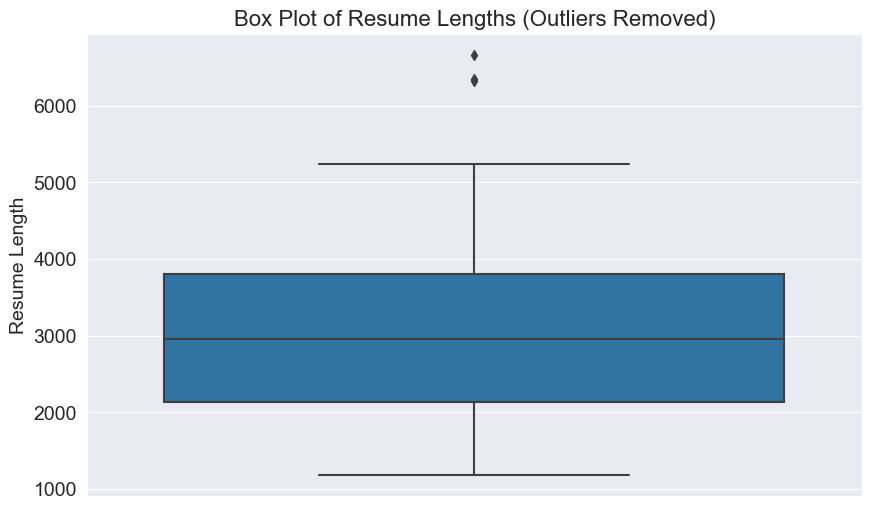


Summary of Findings:
- The distribution of resume lengths is approximately normal after removing outliers.
- The mean resume length is 3170.4 and the median resume length is 2962.0
- The minimum and maximum resume lengths are 1181 and 6659 respectively.


In [76]:
# Calculate key statistics of the cleaned data
mean_resume_length = cleaned_resume_data['Resume_Length'].mean()
median_resume_length = cleaned_resume_data['Resume_Length'].median()
min_resume_length = cleaned_resume_data['Resume_Length'].min()
max_resume_length = cleaned_resume_data['Resume_Length'].max()

# Print key statistics
print("Key Statistics after Removing Outliers:")
print("Mean Resume Length:", mean_resume_length)
print("Median Resume Length:", median_resume_length)
print("Minimum Resume Length:", min_resume_length)
print("Maximum Resume Length:", max_resume_length)

# Plotting the distribution of resume lengths without outliers
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_resume_data['Resume_Length'], bins=30, kde=True)
plt.title('Distribution of Resume Lengths (Outliers Removed)', fontsize=16)
plt.xlabel('Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Creating a box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=cleaned_resume_data['Resume_Length'])
plt.title('Box Plot of Resume Lengths (Outliers Removed)', fontsize=16)
plt.ylabel('Resume Length', fontsize=14)
plt.show()

# Additional exploratory visualizations and insights can be added here...

# Summary of findings
print("\nSummary of Findings:")
print("- The distribution of resume lengths is approximately normal after removing outliers.")
print("- The mean resume length is", mean_resume_length, "and the median resume length is", median_resume_length)
print("- The minimum and maximum resume lengths are", min_resume_length, "and", max_resume_length, "respectively.")